In [7]:
import pandas as pd
import numpy as np
import glob
import json

### First preprocess the screen data and create relevant files

A088=CRISPRi, and A090=CRISPRa

In [47]:
singles = pd.read_csv('/dfs/project/perturb-gnn/AI_RA/horlbeck2018/Raw/K562/CRISPRi_K562_replicateAverage_singlePhenotypes.txt', 
                      delimiter='\t',
                      index_col = 0)
doubles = pd.read_csv('/dfs/project/perturb-gnn/AI_RA/horlbeck2018/Raw/K562/CRISPRi_K562_replicateAverage_phenotypeMatrix.txt',
                      delimiter='\t',
                      index_col = 0)

In [48]:
doubles_gis = pd.read_csv('/dfs/project/perturb-gnn/AI_RA/horlbeck2018/Raw/K562/CRISPRi_K562_replicateAverage_GIscores_genes_inclnegs.txt',
                      delimiter='\t',
                      index_col = 0)

In [49]:
gi_df = pd.DataFrame(doubles_gis.stack())
idx_to_keep = [x for x in gi_df.index if x[0] != x[1]]
gi_df = gi_df.loc[idx_to_keep]
gi_df = gi_df.rename(columns={0:'GI_score'})

gi_df['combo_name'] = ['_'.join(np.sort(x)) for x in gi_df.index]
gi_df = gi_df.drop_duplicates('combo_name')

In [50]:
all_gi_vals = doubles_gis.values.flatten()

In [51]:
# Save ground truth
gi_df.set_index('combo_name').to_csv('/dfs/user/yhr/AI_RA/research_assistant/datasets/ground_truth_Horlbeck.csv')


In [52]:
singles['gene'] = [x.split('_')[0] for x in singles.index]
mean_singles = singles.groupby('gene').mean()

In [53]:
doubles['gene'] = [x.split('_')[0] for x in doubles.index]
doubles = doubles.groupby('gene').mean()

doubles = doubles.T

doubles['gene'] = [x.split('_')[0] for x in doubles.index]
mean_doubles = doubles.groupby('gene').mean()

In [57]:
print(singles['gene'].unique().tolist())

['AARS2', 'AATF', 'ABCB7', 'ACTL6A', 'ACTR10', 'ADAT2', 'ADPRM', 'AFG3L2', 'ANAPC13', 'ANKZF1', 'APOOL', 'ARGLU1', 'ARIH1', 'ARL2', 'ASCC3', 'ASNA1', 'ATP1A1', 'ATP5A1', 'ATP5F1', 'ATP5J2', 'ATP6AP1', 'ATP6V1G1', 'ATXN10', 'AURKA', 'BDP1', 'BNIP1', 'BOD1L1', 'BTF3', 'BUB1B', 'BUB3', 'C11orf30', 'C14orf178', 'C14orf2', 'C6orf203', 'C9orf114', 'CACTIN', 'CAMLG', 'CAPZB', 'CARS2', 'CARS', 'CCDC84', 'CCNK', 'CCT8', 'CDC16', 'CDC23', 'CDC26', 'CDC27', 'CDC40', 'CDC73', 'CDCA8', 'CDK12', 'CDK1', 'CENPK', 'CENPM', 'CENPP', 'CENPW', 'CEP152', 'CEP192', 'CEP63', 'CHMP2A', 'CIRH1A', 'CIT', 'CKAP5', 'CLSPN', 'CMAS', 'CNOT1', 'COA3', 'COG3', 'COPE', 'COPS2', 'COPS4', 'COPS5', 'COQ2', 'COX16', 'COX5A', 'COX6C', 'COX7C', 'CSTF3', 'CTNNBL1', 'CYB5B', 'DAP3', 'DARS', 'DCAF7', 'DCTN2', 'DCTN4', 'DDX18', 'DDX46', 'DHODH', 'DHX37', 'DICER1', 'DLST', 'DNA2', 'DNTTIP2', 'DONSON', 'DYNC1H1', 'EBNA1BP2', 'EEF1G', 'EFR3A', 'EIF2B5', 'EIF3C', 'EIF3D', 'EIF3H', 'EIF3M', 'EIF4A1', 'EIF4G1', 'EIF5B', 'EIF6', 'ELP

### Determine hit thresholds and save hits

In [50]:
np.percentile(all_gi_vals, 5)

-1.96644009408

In [51]:
np.percentile(all_gi_vals, 95)

1.81791857649

In [67]:
# Save top hits for synergy and buffering interactions

np.save('/dfs/user/yhr/AI_RA/research_assistant/datasets/topmovers_Horlbeck_synergy.npy',
        gi_df[gi_df['GI_score']<np.percentile(all_gi_vals, 5)]['combo_name'].values)

np.save('/dfs/user/yhr/AI_RA/research_assistant/datasets/topmovers_Horlbeck_buffering.npy',
        gi_df[gi_df['GI_score']>np.percentile(all_gi_vals, 95)]['combo_name'].values)

In [ ]:
upper_thresh = np.percentile(gi_df['GI_score'].values,95)

### Gene selection

Use random gene combinations

In [43]:
gi_df = gi_df.set_index('combo_name')
sample = gi_df.sample(100)

In [45]:
sample[:49]

,GI_score
combo_name,
NFE2L1_SNRPC,0.144198
NOC2L_PRPF18,0.250071
EIF3M_POLD1,0.915691
ARIH1_VPS29,-0.955534
GTPBP4_RPL27,-0.100658
EIF3D_UMPS,0.615254
OPA1_TRPM7,0.233936
ATP1A1_EMC7,-0.001608
EMC4_PMPCB,-0.112237


### Gene selection

Use hit gene combinations

In [19]:
gi_df.set_index('combo_name').sort_values('GI_score')[:50]

,GI_score
combo_name,
HUS1_TIPIN,-13.268931
ANAPC13_PPP2R1A,-12.743485
PELO_WDR61,-12.526512
ANAPC13_SKA3,-12.448141
ERH_SLC39A9,-12.446586
PPP2R1A_SKA3,-12.300060
CENPK_PPWD1,-12.018592
LEO1_WDR61,-11.746035
CYB5B_MBTPS2,-11.745187


### Prediction assessment

In [86]:
prompt= "I am interested in identifying gene combinations that exhibit synergistic effects on cell fitness in K562 cells upon combinatorial knockdown. Synergy is determined by the deviation between the observed cell fitness and the expected fitness, as calculated from the average impact of knocking down each gene individually. Here are the 450 genes from which combinations must be chosen:"

prompt2 = "Using your prior knowledge of biology, can you suggest 30 other combinations that may also show a synergistic effect upon perturbation. I don't want an explanation, just the list of combinations to test. Don't need to write any code but please print the output in the form of a python list. Hint: genetic interactions are often found between functionally related genes"


In [136]:
gene_combinations = [
    ('AARS2', 'LARS'),           # Aminoacyl-tRNA synthetases
    ('ADAT2', 'DARS'),           # Aminoacyl-tRNA synthesis
    ('AFG3L2', 'YTHDC1'),        # RNA metabolism
    ('ANAPC13', 'CDC27'),        # Anaphase promoting complex/cyclosome (APC/C)
    ('ARIH1', 'UBA2'),           # Ubiquitin-protein ligase activity
    ('ARL2', 'NUP43'),           # GTPase activity and nuclear transport
    ('ASCC3', 'EXOSC9'),         # RNA processing
    ('ATP5F1', 'NDUFB2'),        # Mitochondrial electron transport chain
    ('POLR2B', 'POLR3A'),          # Mitotic checkpoint
    ('RPL5', 'RPL11'),           # Ribosomal proteins (large subunit)
    ('CDK12', 'CDK1'),           # Cell cycle regulation
    ('CENPM', 'CENPW'),          # Centromere protein complex
    ('CEP152', 'CEP192'),        # Centrosome assembly
    ('CKAP5', 'TUBGCP3'),        # Microtubule dynamics
        ('MCM3', 'MCM4'),            # Minichromosome maintenance complex components
    ('COG3', 'COPE'),            # Golgi transport complex
    ('COPS2', 'COPS5'),          # COP9 signalosome
    ('COX6C', 'NDUFB1'),         # Respiratory electron transport chain
    ('DDX46', 'EIF4A1'),         # RNA helicases in translation initiation
    ('DHX37', 'EIF3H'),          # RNA metabolism and translation
    ('DNA2', 'MCM4'),            # DNA replication machinery
    ('DONSON', 'MCM3'),          # DNA replication and stability
    ('EIF2B5', 'EIF5B'),         # Translation initiation factors
    ('EMC1', 'EMC4'),            # ER membrane protein complex
    ('EXOSC2', 'SKIV2L2'),       # RNA exosome complex
    ('FARSA', 'FARSB'),          # Fatty acyl-tRNA biosynthesis
    ('GEMIN2', 'SNRNP70'),       # Spliceosomal snRNP assembly
    ('GTF2H1', 'POLR2B'),        # Transcription initiation complex
    ('INTS3', 'INTS5'),          # Integrator complex
    ('KARS', 'QARS')             # Aminoacyl-tRNA synthetases
]


gene_combinations2 = [
    ('ACTR10', 'BOD1L1'),        # Involved in chromosome segregation
    ('ADPRM', 'POLR3B'),         # RNA synthesis and modification
    ('ANKZF1', 'ZMAT2'),         # RNA binding and processing
    ('APOOL', 'COX16'),          # Mitochondrial function
    ('ARGLU1', 'CIRH1A'),        # RNA metabolism
('MRPL10', 'MRPL33'),  # Mitochondrial ribosomal proteins
    ('ATP6AP1', 'NDUFB4'),       # Mitochondrial and vesicular transport
    ('BDP1', 'MED1'),            # Transcriptional regulation
    ('BNIP1', 'SEC22B'),         # Apoptosis and ER-Golgi transport
    ('BTF3', 'NACA'),            # Protein synthesis and folding
    ('C11orf30', 'EMG1'),        # Nucleolar function
    ('C14orf2', 'NDUFA9'),       # Mitochondrial electron transport
    ('C6orf203', 'XRN2'),        # RNA processing
    ('CACTIN', 'SNRPB'),         # Cytoskeleton and spliceosome
    ('CAMLG', 'YTHDC1'),         # Calcium signaling and RNA modification
    ('CARS2', 'QARS'),           # Aminoacyl-tRNA synthetases
    ('CCDC84', 'TUBGCP5'),       # Cilia function and microtubule organizing
    ('CDC16', 'CDC40'),          # Cell cycle control
    ('CDC23', 'ANAPC13'),        # Anaphase promoting complex/cyclosome (APC/C)
    ('CDCA8', 'BUB3'),           # Mitotic spindle assembly
    ('CENPK', 'ZWINT'),          # Kinetochores function
    ('CENPP', 'CENPW'),          # Centromere protein complex
    ('CHMP2A', 'VPS4A'),         # Endosomal sorting complex
    ('CLSPN', 'RAD51'),          # DNA repair and replication
    ('COA3', 'UQCRB'),           # Mitochondrial respiratory chain
    ('MRPL19', 'MRPL42'),         # Mitochondrial ribosomal proteins
    ('CTNNBL1', 'PPP2R1A'),      # Cell signaling and protein phosphatase
    ('CYB5B', 'NDUFA8'),         # Electron transport chain
    ('DAP3', 'MRPS5'),           # Mitochondrial ribosome
    ('DCTN2', 'DCTN4')           # Dynactin complex components
]

gene_combinations3 = [
    ("ACTL6A", "BOD1L1"),
    ("AFG3L2", "ARIH1"),
    ("ATP1A1", "ATP5A1"),
    ("C11orf30", "C14orf178"),
    ("CARS", "QARS"),
    ("CDC23", "CDC27"),
    ("CDK12", "CDK1"),
    ("CEP152", "CEP63"),
    ("COX5A", "COX7C"),
    ("CYB5B", "NDUFB2"),
    ("DCTN2", "DCTN4"),
    ("DDX18", "DDX46"),
    ("EIF3C", "EIF3H"),
    ("EMC1", "EMC6"),
    ("EXOSC2", "EXOSC9"),
    ("GEMIN2", "GEMIN4"),
    ("INTS3", "INTS5"),
    ("KARS", "LARS"),
    ("MCM3", "MCM4"),
    ("MRPL15", "MRPL22"),
    ("NDUFA9", "NDUFB4"),
    ("POLR2B", "POLR3A"),
    ("PPP2R1A", "PPP2R2A"),
    ("PSMC1", "PSMC2"),
    ("RPL11", "RPL5"),
    ("RPS18", "RPS27A"),
    ("SNRNP70", "SNRPC"),
    ("TUBGCP3", "TUBGCP4"),
    ("VPS29", "VPS4A"),
    ("ZMAT2", "ZMAT5")
]



preds = ['_'.join(np.sort(g)) for g in gene_combinations]
preds2 = ['_'.join(np.sort(g)) for g in gene_combinations2]
preds3 = ['_'.join(np.sort(g)) for g in gene_combinations3]

In [141]:
lower_thresh = np.percentile(gi_df['GI_score'].values,5)

In [160]:
selected = gi_df.loc[preds+preds2+preds3]
random_sample = gi_df.sample(30*3)

In [193]:
random_scores_step1 = []
random_scores_step2 = []
random_scores_step3 = []

select_scores_step1 = []
select_scores_step2 = []
select_scores_step3 = []

for i in range(10):
    random_sample = gi_df.sample(30*3)
    random_scores_step1.append(np.sum(random_sample['GI_score'][:30]>upper_thresh) + 
                  np.sum(random_sample['GI_score'][:30]<lower_thresh))
    random_scores_step2.append(np.sum(random_sample['GI_score'][:60]>upper_thresh) + 
                  np.sum(random_sample['GI_score'][:60]<lower_thresh))
    random_scores_step3.append(np.sum(random_sample['GI_score'][:90]>upper_thresh) + 
                  np.sum(random_sample['GI_score'][:90]<lower_thresh))
    
for i in range(10):
    select_scores_step1.append(np.sum(selected['GI_score'][:30]>upper_thresh) + 
                  np.sum(selected['GI_score'][:30]<lower_thresh))
    select_scores_step2.append(np.sum(selected['GI_score'][:60]>upper_thresh) + 
                  np.sum(selected['GI_score'][:60]<lower_thresh))
    select_scores_step3.append(np.sum(selected['GI_score'][:90]>upper_thresh) + 
                  np.sum(selected['GI_score'][:90]<lower_thresh))

In [199]:
np.mean(np.divide(random_scores_step3,90))

0.09444444444444444

In [200]:
np.mean(np.divide(select_scores_step3,90))

0.22222222222222224

In [171]:
3/5000

0.0006

In [167]:
print(np.mean(scores_step1))
print(np.std(scores_step1))

2.9
1.4456832294800959


In [162]:
(9+16+9+6)/4

10.0

In [154]:
np.sum(selected['GI_score']>upper_thresh) + np.sum(selected['GI_score']<lower_thresh)

20

In [161]:
np.sum(random_sample['GI_score']>upper_thresh) + np.sum(random_sample['GI_score']<lower_thresh)

9

In [149]:
random_sample

,GI_score
combo_name,
ADAT2_PRPF18,-0.316143
RPS18_TIMM23B,0.742683
COX16_SNIP1,0.633715
NFYC_PELO,-0.861689
MED23_MRPS16,-2.244036
...,...
C14orf178_CYB5B,-1.916694
NOL10_RINT1,0.257085
EXOSC4_SRP19,0.895858


In [108]:
prompt= "I am interested in identifying gene combinations that exhibit synergistic effects on cell fitness in K562 cells upon combinatorial knockdown. Synergy is determined by the deviation between the observed cell fitness and the expected fitness, as calculated from the average impact of knocking down each gene individually. Here are the 450 genes from which combinations must be chosen:"

prompt2 = "Using your prior knowledge of biology, can you suggest 30 other combinations that may also show a synergistic effect upon perturbation. I don't want an explanation, just the list of combinations to test. Don't need to write any code but please print the output in the form of a python list. Hint: genetic interactions are often found between functionally related genes"

## ----

prompt3 = "Great job you identified several strong hits showing either synergistic or buffering effects such as ... Now can you identify the next round of 30 gene combinations. Make sure the combinations belong to the set of 450 genes defined initially."

In [101]:
np.sum(gi_df.loc[preds2]['GI_score']>np.percentile(gi_df['GI_score'].values,95))

3

In [102]:
np.sum(gi_df.loc[preds2]['GI_score']<np.percentile(gi_df['GI_score'].values,5))

4

In [105]:
np.sum(gi_df.sample(30)<np.percentile(gi_df['GI_score'].values,5))

GI_score    1
dtype: int64

In [107]:
np.sum(gi_df.sample(30)>np.percentile(gi_df['GI_score'].values,95))

GI_score    1
dtype: int64

### Plot interaction effects

/dfs/user/yhr/deepsnap/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


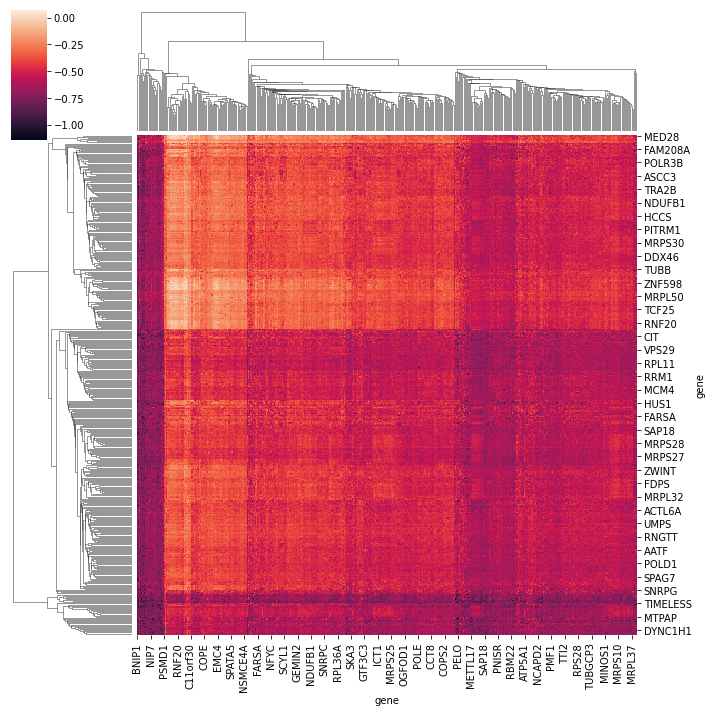

In [38]:
sns.clustermap(mean_doubles)

In [33]:
mean_doubles

gene,AARS2,AATF,ABCB7,ACTL6A,ACTR10,ADAT2,ADPRM,AFG3L2,ANAPC13,ANKZF1,...,ZMAT2,ZMAT5,ZNF511,ZNF574,ZNF598,ZNF830,ZNHIT6,ZNRD1,ZWINT,negative
gene,,,,,,,,,,,,,,,,,,,,,
AARS2,-0.544290,-0.595569,-0.455660,-0.602671,-0.568925,-0.495143,-0.412908,-0.564746,-0.557071,-0.395865,...,-0.636189,-0.506157,-0.553629,-0.567432,-0.421215,-0.696692,-0.552387,-0.500670,-0.505369,-0.432312
AATF,-0.528441,-0.759725,-0.446820,-0.536977,-0.573928,-0.483336,-0.471223,-0.611704,-0.547812,-0.468742,...,-0.693421,-0.501282,-0.511295,-0.510852,-0.485440,-0.537598,-0.516083,-0.499347,-0.582673,-0.446671
ABCB7,-0.602158,-0.499988,-0.336060,-0.458202,-0.638666,-0.296944,-0.317921,-0.562465,-0.456761,-0.212306,...,-0.651330,-0.501966,-0.437246,-0.498882,-0.249888,-0.473618,-0.394643,-0.415569,-0.420531,-0.210868
ACTL6A,-0.717502,-0.561204,-0.451987,-0.719993,-0.583518,-0.472631,-0.440454,-0.593026,-0.551451,-0.381476,...,-0.657516,-0.545536,-0.518795,-0.588910,-0.444985,-0.507833,-0.438534,-0.458346,-0.569476,-0.392176
ACTR10,-0.678047,-0.606904,-0.478603,-0.572163,-0.806315,-0.549786,-0.475436,-0.611876,-0.770559,-0.440708,...,-0.742717,-0.576432,-0.583061,-0.686205,-0.489741,-0.607054,-0.524953,-0.580580,-0.501530,-0.455244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF830,-0.551656,-0.557663,-0.375533,-0.449278,-0.620462,-0.382527,-0.305496,-0.574762,-0.432012,-0.316804,...,-0.677605,-0.446402,-0.409883,-0.479078,-0.312427,-0.624784,-0.327032,-0.400347,-0.514332,-0.273244
ZNHIT6,-0.542644,-0.544220,-0.338593,-0.518005,-0.642693,-0.371544,-0.336606,-0.547263,-0.448969,-0.243008,...,-0.663826,-0.388246,-0.413800,-0.450785,-0.275967,-0.472518,-0.448754,-0.423898,-0.419718,-0.288061
ZNRD1,-0.504428,-0.478179,-0.276612,-0.504081,-0.657239,-0.331635,-0.346181,-0.564494,-0.423176,-0.212968,...,-0.688913,-0.400458,-0.429091,-0.512042,-0.240575,-0.384176,-0.388330,-0.578124,-0.459908,-0.218183


In [30]:
mean_doubles

,AARS2_+_44281027.23-P1P2,AARS2_+_44281044.23-P1P2,AATF_-_35306286.23-P1P2,AATF_-_35306346.23-P1P2,ABCB7_+_74375984.23-P1P2,ABCB7_-_74376019.23-P1P2,ACTL6A_+_179280849.23-P1P2,ACTR10_+_58666892.23-P1P2,ACTR10_+_58666933.23-P1P2,ACTR10_+_58666938.23-P1P2,...,negative_control-10057,negative_control-10081,negative_control-10094,negative_control-10095,negative_control-10100,negative_control-10114,negative_control-10115,negative_control-10130,negative_control-10899,negative_control-10927
gene,,,,,,,,,,,,,,,,,,,,,
AARS2,-0.526944,-0.561636,-0.496007,-0.560875,-0.579169,-0.625146,-0.717502,-0.820914,-0.621078,-0.592149,...,-0.429029,-0.527194,-0.449143,-0.505053,-0.501235,-0.419452,-0.449642,-0.490757,-0.433426,-0.418573
AATF,-0.614129,-0.577008,-0.730351,-0.789099,-0.561340,-0.438636,-0.561204,-0.675742,-0.632857,-0.512112,...,-0.421376,-0.414090,-0.467817,-0.431896,-0.521911,-0.476603,-0.486339,-0.451088,-0.437327,-0.466409
ABCB7,-0.489679,-0.421641,-0.514377,-0.379262,-0.411705,-0.260415,-0.451987,-0.594005,-0.358946,-0.482859,...,-0.180830,-0.294540,-0.167393,-0.225752,-0.221131,-0.210649,-0.180998,-0.171012,-0.165901,-0.186991
ACTL6A,-0.618201,-0.587141,-0.547053,-0.526901,-0.451256,-0.465147,-0.719993,-0.613114,-0.540244,-0.563132,...,-0.357750,-0.548404,-0.535605,-0.440862,-0.495797,-0.380726,-0.583789,-0.556553,-0.382695,-0.375190
ACTR10,-0.508517,-0.629333,-0.572298,-0.575559,-0.676883,-0.600449,-0.583518,-0.962049,-0.694797,-0.762099,...,-0.486371,-0.624712,-0.553812,-0.572904,-0.513281,-0.411939,-0.585077,-0.495738,-0.503132,-0.510268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF830,-0.750392,-0.642992,-0.501499,-0.573697,-0.544701,-0.402536,-0.507833,-0.687804,-0.661760,-0.471599,...,-0.340518,-0.490158,-0.292368,-0.342006,-0.410047,-0.267145,-0.462353,-0.309966,-0.380611,-0.383471
ZNHIT6,-0.562898,-0.541876,-0.503568,-0.528599,-0.425119,-0.364168,-0.438534,-0.506462,-0.537049,-0.531348,...,-0.244897,-0.279785,-0.321391,-0.372269,-0.353831,-0.296698,-0.326058,-0.365584,-0.296893,-0.243059
ZNRD1,-0.514239,-0.487101,-0.503510,-0.495185,-0.446382,-0.384757,-0.458346,-0.723195,-0.502170,-0.516376,...,-0.326579,-0.382431,-0.324919,-0.362841,-0.375543,-0.296908,-0.343347,-0.344736,-0.313086,-0.290455


### Compute topmovers

In [337]:
processed_files = glob.glob('/dfs/user/yhr/AI_RA/research_assistant/datasets/ground_truth_Steinhart_*')

In [338]:
def get_hits(df):
    mean = np.mean(df['1'].values)
    std = np.std(df['1'].values)
    
    up_thresh = mean+std*2
    low_thresh = mean-std*2

    hit_idx_hi = np.where(df['1']>up_thresh)[0]
    hit_idx_lo = np.where(df['1']<low_thresh)[0]
    hit_idx = np.concatenate([hit_idx_hi, hit_idx_lo])

    processed_hits = df.iloc[hit_idx, :].index.values.tolist()
    
    return processed_hits

In [341]:
'topmovers_'+name+'.csv'

'topmovers_Steinhart_crispri_GD2_D13.csv'

In [342]:
for f in processed_files:
    df = pd.read_csv(f, index_col=0)
    processed_hits = get_hits(df)
    
    name = f.split('/ground_truth_')[-1].split('.csv')[0]
    np.save('./datasets/topmovers_'+name+'.csv', processed_hits)

### Write task prompts

In [370]:
task_prompt = {"Task": '', "Measurement": ''}
exp_type_map = {'crispri':'inactivation', 'crispra': 'activation'}
car_type_map = {'GD2':'HA GD2', 'CD19': 'CD19'}

for f in processed_files:
    save_name = f.split('/ground_truth_')[-1]
    save_name = save_name.split('.csv')[0]
    
    exp_name = f.split('/ground_truth_Steinhart_')[-1]
    exp_type, car_type, day = exp_name.split('_')
    day = day.split('.')[0][1:]
    exp_type = exp_type_map[exp_type]
    car_type = car_type_map[car_type]
    
    task_prompt["Task"] = f"identify genes that upon {exp_type} allow cells to resist T-cell exhaustion, under the {car_type} CAR (chimeric-antigenic receptor) condition"
    task_prompt["Measurement"] = f"the log fold change in normalized sgRNA read counts compared to the non-targeting control, {day} days after perturbation"    
    
    file_path = f'./datasets/task_prompts/{save_name}'+'.json'
    with open(file_path, 'w') as file:
        json.dump(task_prompt, file)

In [369]:
task_prompt

{'Task': 'identify genes that upon inactivation allow cells to resist T-cell exhaustion, under the HA GD2 CAR (chimeric-antigenic receptor) condition',
 'Measurement': 'the log fold change in normalized sgRNA read counts compared to the non-targeting control, 13 days after perturbation'}

In [357]:
task_prompt

{'Task': 'identify genes that upon inactivation allow cells to resist T-cell exhaustion, under the HA GD2 CAR (chimeric-antigenic receptor) condition',
 'Measurement': 'the log fold change in normalized sgRNA read counts compared to the non-targeting control, 13 days after perturbation'}

In [175]:
task_prompt = 'I ran a perturbation screen where  450 genes were knocked down. The effects of each of these knockdown on cell fitness is shown here. The more negative the number the greater the decrease in cell fitness.'+\
              'I now ran gene knockdown perturbation on some combinations of these genes. The following genes showed a strong synergistic effect upon combinatorial perturbation that was very distinct from the expected effect of perturbing the two genes in combination'+\
              "Using your prior knowledge of biology and the single-gene perturbation data provided above, can you suggest 30 other combinations that may also show a synergistic effect upon perturbation. I don't want an explanation, just the list of combinations to test. Don't need to write any code but please print the output in the form of a python list"
        
        

In [177]:
task_prompt

"I ran a perturbation screen where  450 genes were knocked down. The effects of each of these knockdown on cell fitness is shown here. The more negative the number the greater the decrease in cell fitness.I now ran gene knockdown perturbation on some combinations of these genes. The following genes showed a strong synergistic effect upon combinatorial perturbation that was very distinct from the expected effect of perturbing the two genes in combinationUsing your prior knowledge of biology and the single-gene perturbation data provided above, can you suggest 30 other combinations that may also show a synergistic effect upon perturbation. I don't want an explanation, just the list of combinations to test. Don't need to write any code but please print the output in the form of a python list"

In [ ]:
  "Task": "Identify gene combinations that exhibit synergistic effects on cell fitness in K562 cells upon combinatorial knockdown. Synergy should be determined by the deviation between the observed cell fitness and the expected fitness, which is calculated from the average impact of knocking down each gene individually.",
  "Measurement": "The difference between the actual change in cell fitness and the expected additive effect from the individual knockdowns of the two genes."

### Check prediction

In [117]:
new_gene_combinations = [
    ("ANAPC13", "CENPP"),    # Related to ANAPC13 combinations
    ("PPP2R1A", "PPWD1"),    # Related to PPP2R1A combinations
    ("CENPK", "CENPW"),      # Related to CENPK combinations
    ("LEO1", "TAF1"),        # Related to LEO1 combinations
    ("CYB5B", "NDUFB2"),     # Related to CYB5B combinations
    ("PELO", "SNRNP70"),     # Related to PELO combinations
    ("EXOSC4", "EXOSC2"),    # Related to EXOSC4 combinations
    ("WDR61", "WDR36"),      # Related to WDR61 combinations
    ("ARL2", "ARGLU1"),      # Related to ARL2 combinations
    ("HUS1", "RAD51"),       # Related to HUS1 combinations
    ("SKA3", "KIF11"),       # Related to SKA3 combinations
    ("CAMLG", "COX6C"),      # Related to CAMLG combinations
    ("MBTPS2", "FDPS"),      # Related to MBTPS2 combinations
    ("ZMAT5", "ZMAT2"),      # Related to ZMAT5 combinations
    ("BOD1L1", "TTI2"),      # Related to BOD1L1 combinations
    ("CENPM", "CENPW"),      # Related to CENPM combinations
    ("CEP63", "CEP192"),     # Related to CEP63 combinations
    ("NUDC", "NUBP1"),       # Related to NUDC combinations
    ("TIMELESS", "TIPIN"),   # Related to TIMELESS combinations
    ("XRN2", "DICER1"),      # Related to XRN2 combinations
    ("CENPW", "CENPM"),      # Related to SGOL1 combinations
    ("ZWINT", "CENPW"),      # Related to ZWINT combinations
    ("MCM3", "MCM4"),      # Related to PDCD7 combinations
    ("COPS2", "COPS4"),      # Related to COPS2 combinations
    ("GOLT1B", "COG3"),      # Related to GOLT1B combinations
    ("MED23", "MED17"),      # Related to MED23 combinations
    ("NUP54", "NUP85"),      # Related to NUP54 combinations
    ("PRIM2", "POLA1"),      # Related to PRIM2 combinations
    ("EIF3C", "EIF3D"),        # Related to SDHC combinations
    ("EMC2", "EMC4"),        # Related to EMC2 combinations
    ("ATP6AP1", "ATP5A1"),   # Related to ATP6AP1 combinations
    ("PMPCB", "PITRM1")      # Related to PMPCB combinations
]

pred_genes = ['_'.join(np.sort(x)) for x in new_gene_combinations]

In [119]:
gi_df.set_index('combo_name').loc[pred_genes,:]

,GI_score
combo_name,
ANAPC13_CENPP,-0.794119
PPP2R1A_PPWD1,1.085725
CENPK_CENPW,1.822229
LEO1_TAF1,-1.816727
CYB5B_NDUFB2,-1.003531
PELO_SNRNP70,-0.022609
EXOSC2_EXOSC4,-1.767311
WDR36_WDR61,2.062844
ARGLU1_ARL2,-1.459535


In [120]:
gi_df

GI_score       combo_name
AARS2  AATF      0.360710       AARS2_AATF
       ABCB7    -1.011233      AARS2_ABCB7
       ACTL6A   -1.864589     AARS2_ACTL6A
       ACTR10   -0.051815     AARS2_ACTR10
       ADAT2    -0.287595      AARS2_ADAT2
...                   ...              ...
ZNHIT6 ZWINT     0.071484     ZNHIT6_ZWINT
       negative  0.025523  ZNHIT6_negative
ZNRD1  ZWINT    -1.410080      ZNRD1_ZWINT
       negative  0.040062   ZNRD1_negative
ZWINT  negative  0.057656   ZWINT_negative

[100576 rows x 2 columns]

### Norman dataset

In [268]:
import pickle

with open('/dfs/user/yhr/gears2/GI_data.pkl', 'rb') as f:
    loaded = pickle.load(f)
    
emap_df = pd.DataFrame(loaded['good_emap'].stack())

emap_df['Gene_pairs'] = [np.sort(x) for x in emap_df.index.values]
emap_df = emap_df.rename(columns={0:'Score'})
emap_df = emap_df.reset_index().loc[:, ['Score', 'Gene_pairs']]

emap_df['Gene_pairs'] = [(x[0],x[1]) for x in emap_df['Gene_pairs'].values]
emap_df = emap_df.groupby('Gene_pairs').mean().reset_index()

emap_df.to_csv('/dfs/user/yhr/testing/research_assistant/datasets/ground_truth_NormanGI.csv', index=False)

In [269]:
all_gi_vals_norman = emap_df['Score'].values

lower_thresh = np.percentile(all_gi_vals_norman, 5)
upper_thresh = np.percentile(all_gi_vals_norman, 95)

topmover_df = emap_df[np.logical_or(emap_df['Score'] < lower_thresh, emap_df['Score'] > upper_thresh)]

In [270]:
topmover_list = [list(x) for x in topmover_df['Gene_pairs'].values]

np.save('/dfs/user/yhr/testing/research_assistant/datasets/topmovers_NormanGI.npy',
        topmover_list)